In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig
from time import process_time

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.20.1 scipy==1.6.0 pandas==1.2.2 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
adata = sq.datasets.imc()

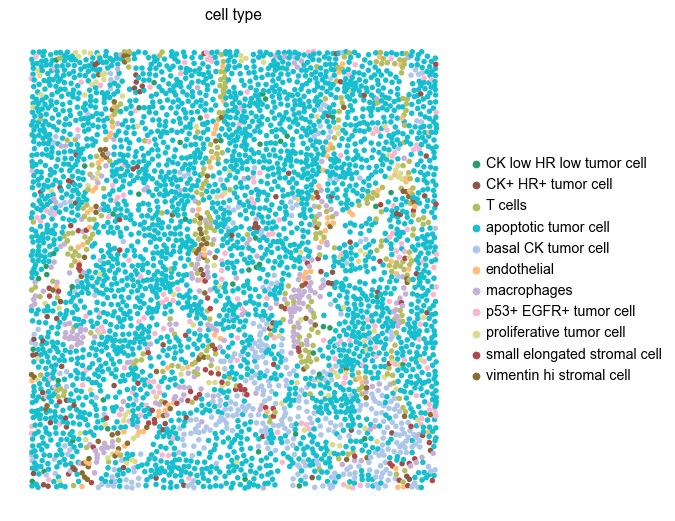

In [3]:
sc.pl.spatial(adata, color="cell type", spot_size=10, frameon=False)

Calculating Ripley's K
Adding `adata.uns['cell type_ripley_k']`


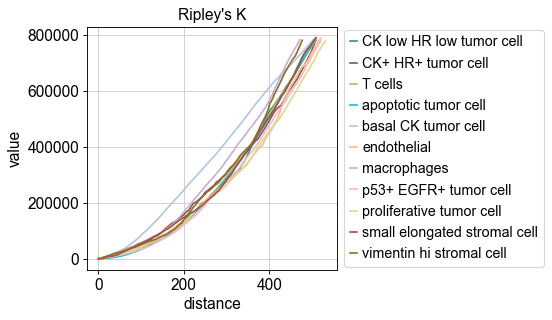

In [4]:
sq.gr.ripley_k(adata, cluster_key="cell type")
sq.pl.ripley_k(adata, cluster_key="cell type", figsize=(4, 4))

Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


  0%|          | 0/1 [00:00<?, ?/s]

Adding `adata.uns['cell type_co_occurrence']`
Finish (0:00:08)


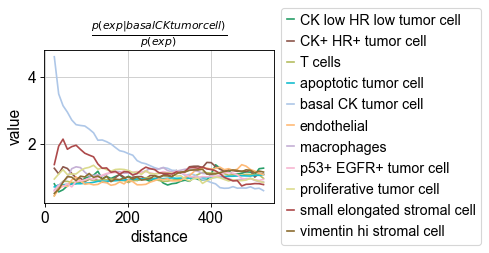

In [5]:
sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(
    adata, cluster_key="cell type", clusters="basal CK tumor cell", figsize=(6, 3)
)

Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['cell type_nhood_enrichment']`
Finish (0:00:04)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/Users/giovanni.palla/Projects/squidpy/squidpy/pl/_utils.py:536: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  col_ax = divider.append_axes("top", size="5%")


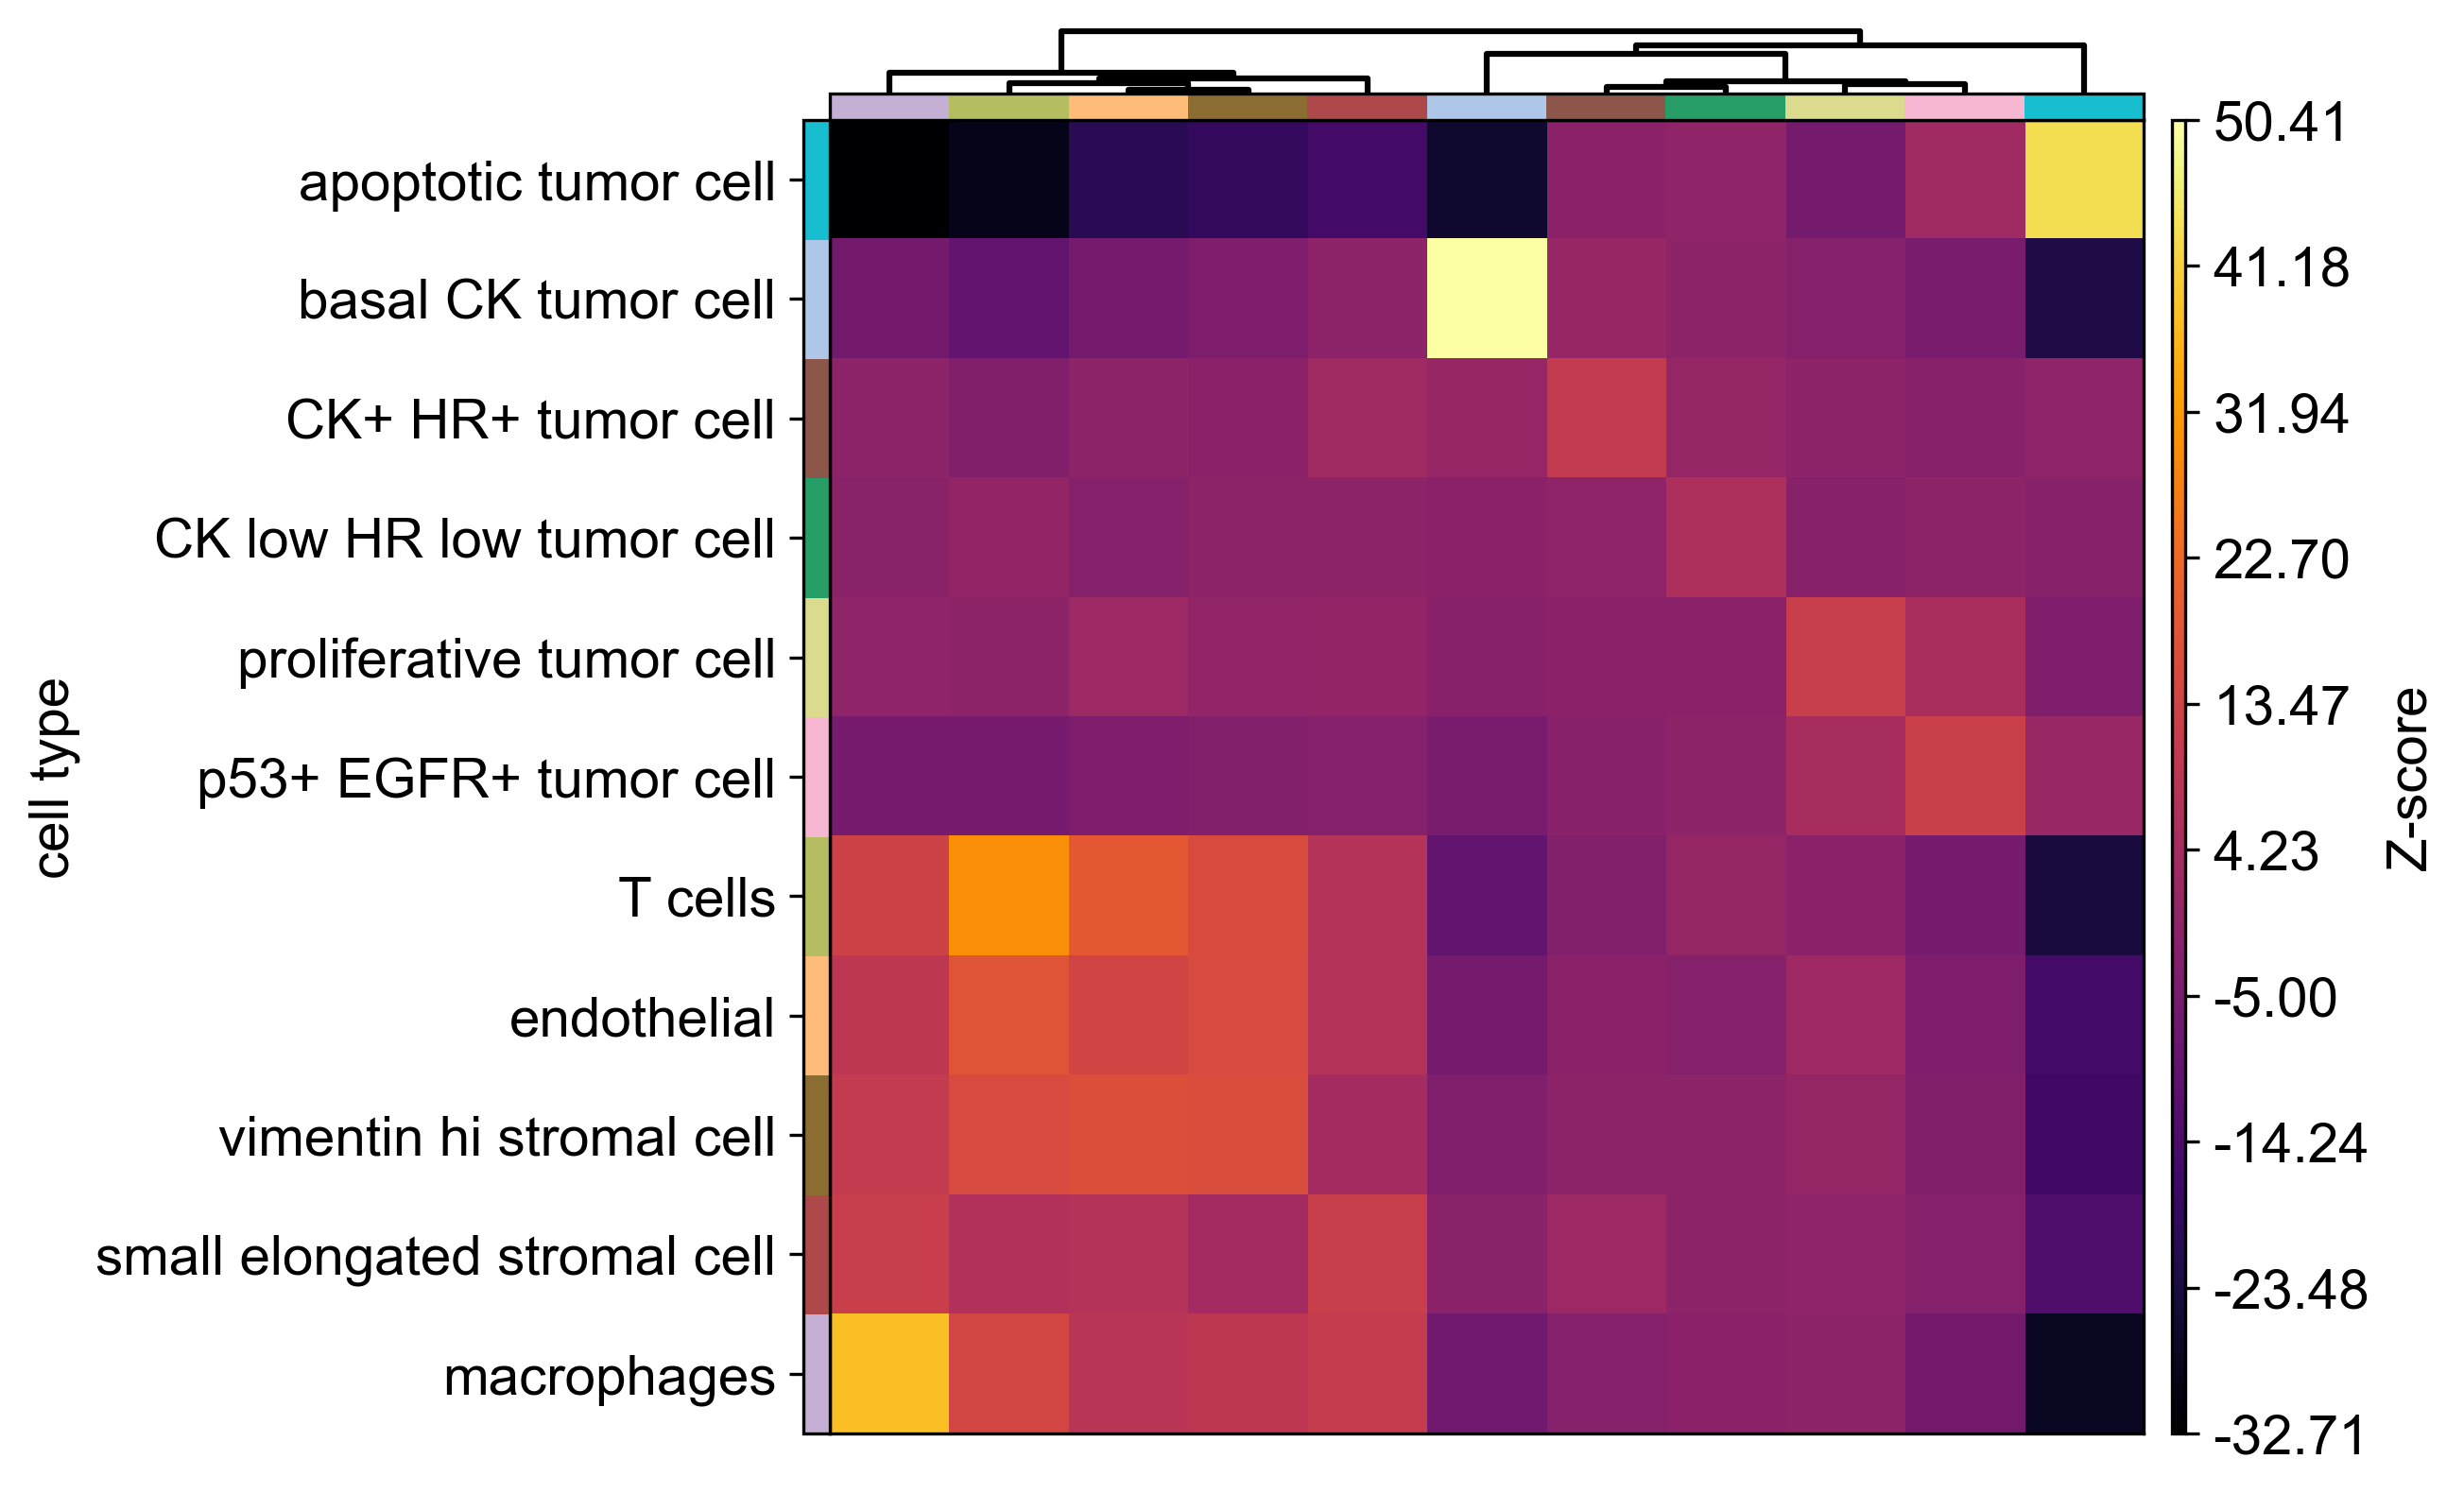

In [16]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell type")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cell type",
    cmap="inferno",
    title="",
    method="ward",
    dpi=300,
    figsize=(5, 5),
    save="nhod_seqfish.png",
    cbar_kwargs={"label": "Z-score"},
    #     vmin=-100,
    #     vmax=100,
)

In [7]:
sc.pp.scale(adata)
sq.gr.moran(adata)

Calculating for `34` genes using `1` core(s)


  0%|          | 0/34 [00:00<?, ?/s]

Adding `adata.uns['moranI']`
Finish (0:00:14)


In [8]:
adata.uns["moranI"]

,I,pval_sim,VI_sim,pval_sim_fdr_bh
3521227Gd155Di Slug,0.705980,0.0,0.000064,0.0
6967Gd160Di CD44,0.605236,0.0,0.000069,0.0
1031747Er167Di ECadhe,0.559009,0.0,0.000072,0.0
234832Lu175Di panCyto,0.539529,0.0,0.000064,0.0
1921755Sm149Di Vimenti,0.500024,0.0,0.000070,0.0
phospho mTOR,0.497911,0.0,0.000073,0.0
3281668Nd142Di Fibrone,0.487751,0.0,0.000068,0.0
971099Nd144Di Cytoker,0.479804,0.0,0.000072,0.0
346876Sm147Di Keratin,0.476037,0.0,0.000070,0.0
174864Nd148Di SMA,0.458612,0.0,0.000070,0.0


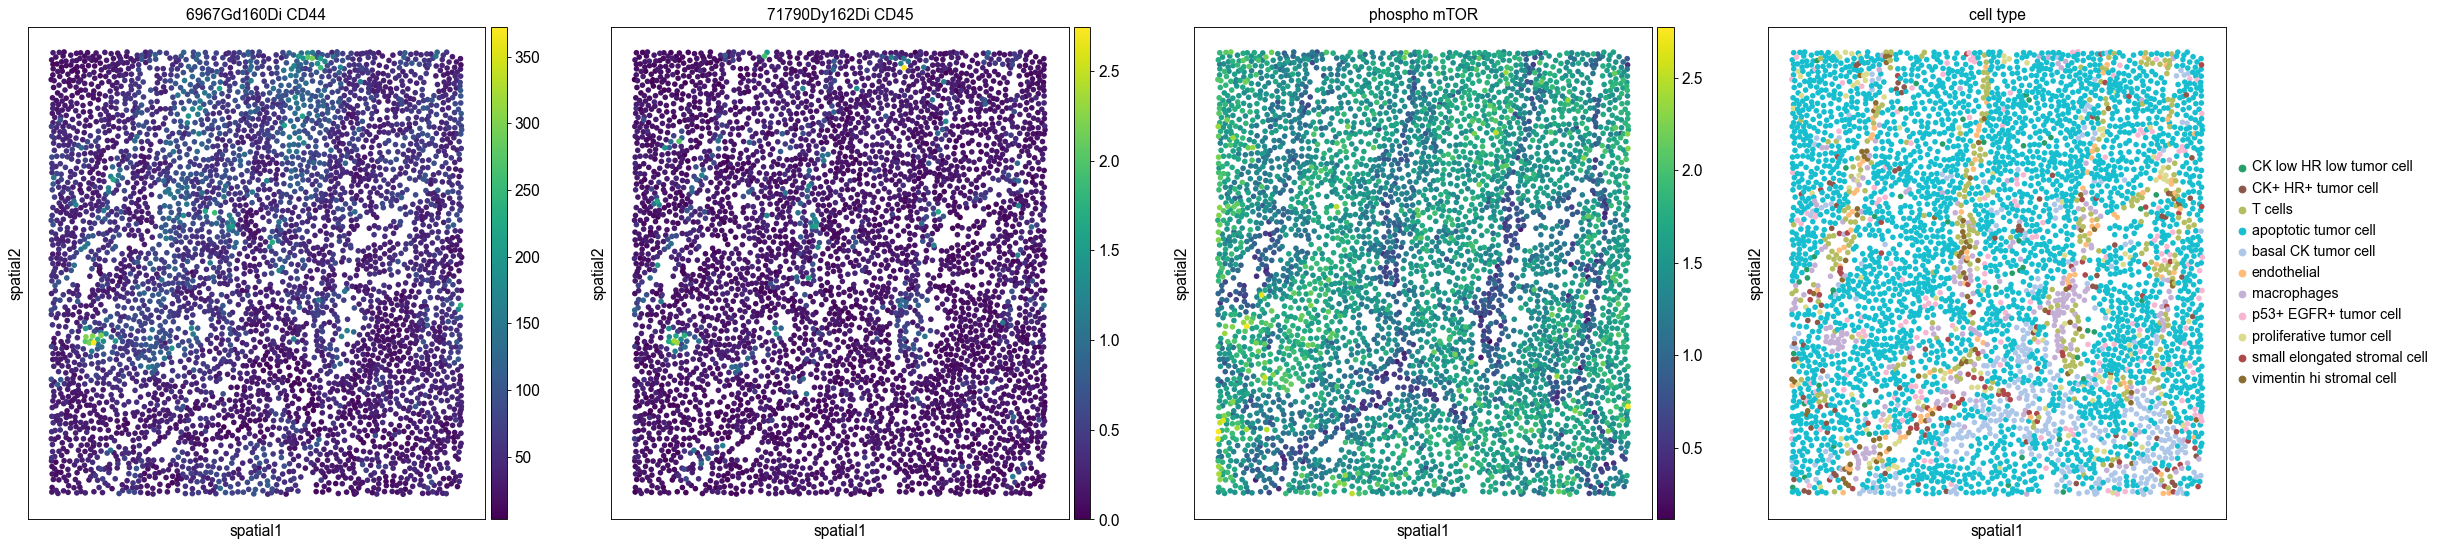

In [9]:
sc.pl.spatial(
    adata,
    color=["6967Gd160Di CD44", "71790Dy162Di CD45", "phospho mTOR", "cell type"],
    spot_size=10,
)

In [10]:
sq.gr.centrality_scores(adata, cluster_key="cell type")

Calculating centralities `[degree_centrality, average_clustering, closeness_centrality]` using `1` core(s)
Adding `adata.uns['cell type_centrality_scores']`
Finish (0:00:00)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


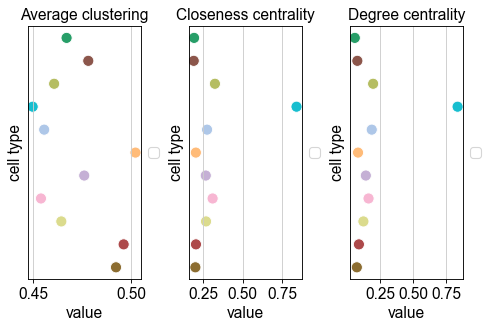

In [26]:
sq.pl.centrality_scores(
    adata, cluster_key="cell type", s=100, figsize=(6, 4), legend=None
)